In [1]:
import matplotlib
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import Ellipse
from sympy import *
from itertools import cycle
from scipy.optimize import fmin
#import seaborn as sns
%matplotlib inline

#sns.set(font_scale=1.4)
np.set_printoptions(suppress=True) # disable sci notation

cycol = cycle('bgrm')

In [2]:
# target function
def f2(x):
    return -31 * x[0] ** 2  - 34 * x[1] ** 2 + 4 * x[0] * x[1] + 286 * x[0] + 388 * x[1]

def f(x1, x2):
    return f2([x1, x2])

# Метод Лагранжа

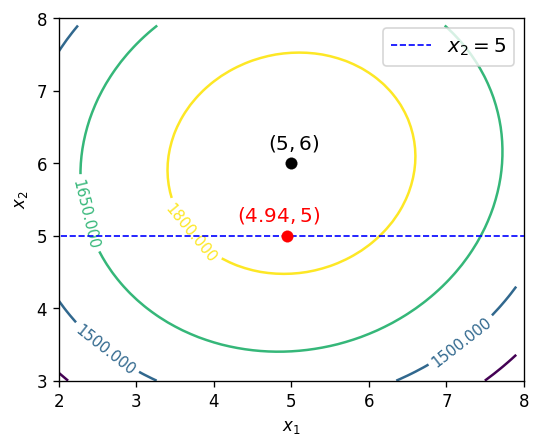

In [3]:
xlim = (2, 8)
ylim = (3, 8)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 4), dpi=120)
CS = plt.contour(X, Y, Z, 5)
plt.clabel(CS, fontsize=9, inline=1)

plt.plot([0, 10], [5, 5], c='b', linestyle='--', linewidth=1, zorder=5, label='$x_2 = 5$') # largange

plt.text(4.7, 6.2, '$(5, 6)$', fontsize=12)
plt.scatter(5, 6, c='k', marker='o', s=50, linewidth=0.1)

plt.text(4.3, 5.2, '$(4.94, 5)$', color='r', fontsize=12)
plt.scatter(4.94, 5, c='r', marker='o', s=50, linewidth=0.1, zorder=10)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=1, frameon=True, fancybox=True, fontsize=12)
plt.savefig('../pics/lagrange', bbox_inches='tight')
plt.show()

# Метод Билла

In [4]:
# restrictions
def g1(x):
    return (84 - 7 * x) / 12

def g2(x):
    return (80 - 10 * x) / 8

def g3(x):
    return 0 * x

def g4(x):
    return 0

In [5]:
X0 = [0, 0]
X1 = [0, 97/17]
X2 = [264/131, 12971/2227]
X3 = [447691/110171, 509045/110171]

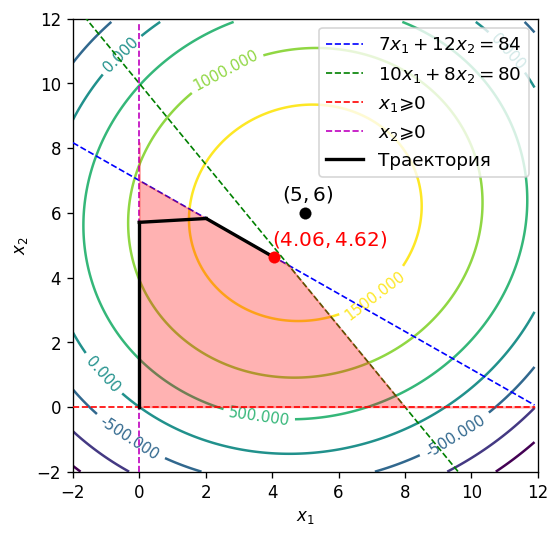

In [6]:
xlim = (-2, 12)
ylim = (-2, 12)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

plt.plot(x, g1(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$7x_1 + 12x_2 = 84$')
plt.plot(x, g2(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$10x_1 + 8x_2 = 80$')
plt.plot(x, g3(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$x_1 \geqslant 0$')
plt.plot(np.zeros(len(x)), x, c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$x_2 \geqslant 0$')

plt.text(4.3, 6.4, '$(5, 6)$', fontsize=12)
plt.scatter(5, 6, c='k', marker='o', s=50, linewidth=0.1)

plt.text(4, 5, '$(4.06, 4.62)$', color='r', fontsize=12)
plt.scatter(X3[0], X3[1], c='r', marker='o', s=50, linewidth=0.1, zorder=15)

l1 = g1(x)
l2 = g2(x)
l3 = g3(x)
l4 = np.clip(np.minimum(l1, l2), 0, 100)
plt.fill_between(np.clip(x, 0, 100), l3, l4, color='r', alpha=0.3, zorder=10)

plt.plot([X0[0], X1[0]], [X0[1], X1[1]], c='k', linewidth=2, zorder=10, label='Траектория')
plt.plot([X1[0], X2[0]], [X1[1], X2[1]], c='k', linewidth=2, zorder=10)
plt.plot([X2[0], X3[0]], [X2[1], X3[1]], c='k', linewidth=2, zorder=10)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=0, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../pics/bil', bbox_inches='tight')
plt.show()

# Метод проекции градиента

In [7]:
A = np.array([[7, 12], [10, 8], [-1, 0], [0, -1]])

In [8]:
b = np.array([84, 80, 0, 0]).reshape((4, 1))
b

array([[84],
       [80],
       [ 0],
       [ 0]])

In [9]:
def grad(X):
    return np.array([
        [-62 * X[0] + 4 * X[1] + 286],
        [-68 * X[1] + 4 * X[0] + 388]
    ])

In [10]:
H = np.array([[-62, 4], [4, -68]])

In [11]:
X0 = np.array([0, 0], dtype=np.float32)

In [12]:
A[2:4, :].dot(grad(X0))

array([[-286.],
       [-388.]])

In [13]:
K = grad(X0)
K

array([[ 286.],
       [ 388.]])

In [14]:
A.dot(grad(X0))

array([[ 6658.],
       [ 5964.],
       [ -286.],
       [ -388.]])

In [15]:
t0 = -grad(X0).T.dot(K) / K.T.dot(H).dot(K)
t0

array([[ 0.01611167]])

In [16]:
t1 = (b[0] + A[0,:].dot(X0)) / A[0,:].dot(K)
t1

array([ 0.0126164])

In [17]:
t2 = (b[1] + A[1,:].dot(X0)) / A[1,:].dot(K)
t2

array([ 0.01341382])

In [18]:
t = np.min([t0, t1, t2])
t = np.round(t, decimals=4)
t

0.0126

In [19]:
X1 = X0 + t * K.flatten()
X1[np.newaxis].T

array([[ 3.6036],
       [ 4.8888]])

In [20]:
A1 = A[0,:][np.newaxis]
A1

array([[ 7, 12]])

In [21]:
P01 = A1.T.dot(inv(A1.dot(A1.T))).dot(A1)
np.round(P01, decimals=4)

array([[ 0.2539,  0.4352],
       [ 0.4352,  0.7461]])

In [22]:
P = np.identity(2) - P01
np.round(P, decimals=4)

array([[ 0.7461, -0.4352],
       [-0.4352,  0.2539]])

In [23]:
K1 = P.dot(grad(X1))
K1

array([[ 30.82395855],
       [-17.98064249]])

In [24]:
np.round(A.dot(K1), decimals=4)

array([[  -0.    ],
       [ 164.3944],
       [ -30.824 ],
       [  17.9806]])

In [25]:
t0 = -grad(X1).T.dot(K1) / K1.T.dot(H).dot(K1)
t0

array([[ 0.01492422]])

In [26]:
t2 = (b[1] + A[1,:].dot(X1)) / A[1,:].dot(K1)
t2

array([ 0.94374478])

In [27]:
t4 = -(b[3] + A[3,:].dot(X1)) / A[3,:].dot(K1)
t4

array([ 0.2718924])

In [28]:
t = np.min([t0, t2, t4])
t

0.014924218991648619

In [29]:
X2 = X1 + t * K1.flatten()
X2

array([ 4.06362351,  4.62045295])

In [30]:
K2 = grad(X2)

In [31]:
P.dot(K2)

array([[-0.],
       [ 0.]])

In [32]:
L = -inv(A1.dot(A1.T)).dot(A1).dot(grad(X2))
L

array([[-7.50530776]])

In [33]:
f2(X2)

1792.2791709137025

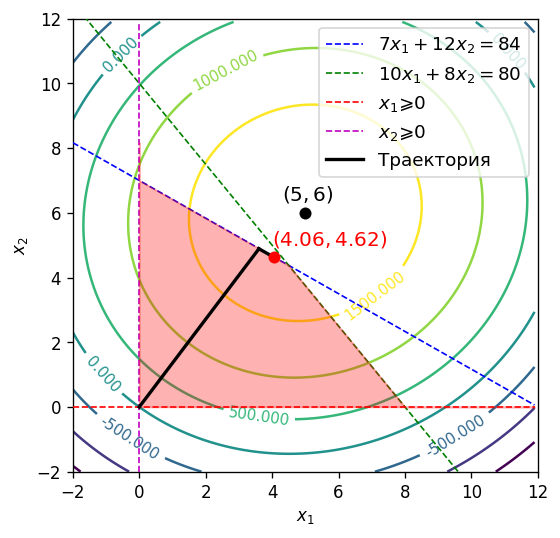

In [34]:
xlim = (-2, 12)
ylim = (-2, 12)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

plt.plot(x, g1(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$7x_1 + 12x_2 = 84$')
plt.plot(x, g2(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$10x_1 + 8x_2 = 80$')
plt.plot(x, g3(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$x_1 \geqslant 0$')
plt.plot(np.zeros(len(x)), x, c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$x_2 \geqslant 0$')

plt.text(4.3, 6.4, '$(5, 6)$', fontsize=12)
plt.scatter(5, 6, c='k', marker='o', s=50, linewidth=0.1)

plt.text(4, 5, '$(4.06, 4.62)$', color='r', fontsize=12)
plt.scatter(X2[0], X2[1], c='r', marker='o', s=50, linewidth=0.1, zorder=15)

l1 = g1(x)
l2 = g2(x)
l3 = g3(x)
l4 = np.clip(np.minimum(l1, l2), 0, 100)
plt.fill_between(np.clip(x, 0, 100), l3, l4, color='r', alpha=0.3, zorder=10)

plt.plot([X0[0], X1[0]], [X0[1], X1[1]], c='k', linewidth=2, zorder=10, label='Траектория')
plt.plot([X1[0], X2[0]], [X1[1], X2[1]], c='k', linewidth=2, zorder=10)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=0, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../pics/gradient', bbox_inches='tight')
plt.show()

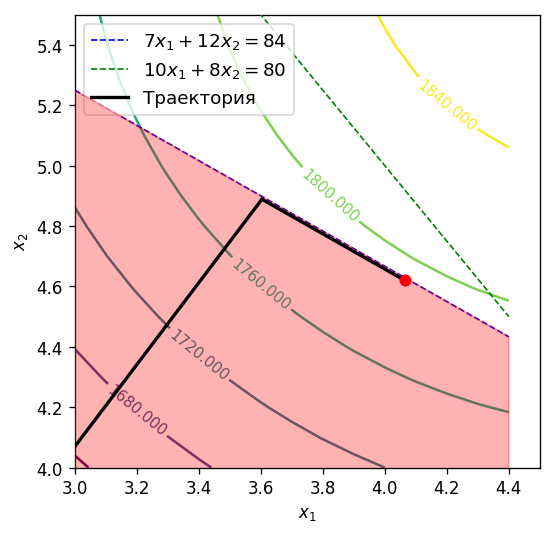

In [35]:
xlim = (3, 4.5)
ylim = (4, 5.5)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1] + 0.1, delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 5)
plt.clabel(CS, fontsize=9, inline=1)

plt.plot(x, g1(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$7x_1 + 12x_2 = 84$')
plt.plot(x, g2(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$10x_1 + 8x_2 = 80$')
#plt.plot(x, g3(x), c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$x_1 \geqslant 0$')
#plt.plot(np.zeros(len(x)), x, c=next(cycol), linestyle='--', linewidth=1, zorder=5, label='$x_2 \geqslant 0$')

#plt.text(4.3, 6.4, '$(5, 6)$', fontsize=12)
#plt.scatter(5, 6, c='k', marker='o', s=50, linewidth=0.1)

#plt.text(4, 5, '$(4.06, 4.62)$', color='r', fontsize=12)
plt.scatter(X2[0], X2[1], c='r', marker='o', s=50, linewidth=0.1, zorder=15)

l1 = g1(x)
l2 = g2(x)
l3 = g3(x)
l4 = np.clip(np.minimum(l1, l2), 0, 100)
plt.fill_between(np.clip(x, 0, 100), l3, l4, color='r', alpha=0.3, zorder=10)

plt.plot([X0[0], X1[0]], [X0[1], X1[1]], c='k', linewidth=2, zorder=10, label='Траектория')
plt.plot([X1[0], X2[0]], [X1[1], X2[1]], c='k', linewidth=2, zorder=10)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left', frameon=True, fancybox=True, fontsize=11)
plt.savefig('../pics/gradient_zoom', bbox_inches='tight')
plt.show()

# Метод штрафных функций

In [36]:
def g(X):
    return 16 * X[0] ** 2 + 25 * X[1] ** 2 - 400

In [37]:
def psi(X):
    return np.where(X < 0, np.zeros_like(X), X)

In [38]:
def f_penalty(x1, x2, mu=1):
    return f2([x1, x2]) - mu * psi(g([x1, x2]))

In [39]:
def f2_penalty(X, mu=1):
    return f2(X) - mu * psi(g(X))

In [40]:
X = []
Mu = []
for i in range(9):
    Mu.append(10**(i-3))
    X.append(fmin(lambda X: -f2_penalty(X, Mu[-1]), [0, 0]))
    i += 1

Optimization terminated successfully.
         Current function value: -1878.100917
         Iterations: 80
         Function evaluations: 152
Optimization terminated successfully.
         Current function value: -1870.091072
         Iterations: 77
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: -1797.559744
         Iterations: 75
         Function evaluations: 142
Optimization terminated successfully.
         Current function value: -1514.608523
         Iterations: 86
         Function evaluations: 163
Optimization terminated successfully.
         Current function value: -1510.877923
         Iterations: 128
         Function evaluations: 246


In [41]:
df = pd.DataFrame(np.column_stack((Mu, X)), columns=['mu', 'x1', 'x2'])
df['f'] = f(df.x1, df.x2)
df

,mu,x1,x2,f
0,0.001,4.997116,5.995389,1878.999073
1,0.010,4.971434,5.954532,1878.909608
2,0.100,4.728513,5.574126,1871.011079
3,1.000,3.187037,3.396179,1565.474694
4,10.000,3.022544,3.186394,1510.877923
5,100.000,3.022737,3.186277,1510.877922
6,1000.000,3.001708,3.198975,1510.845522
7,10000.000,2.996238,3.202255,1510.826311
8,100000.000,2.996238,3.202255,1510.826311


In [42]:
df.to_csv('../data/penalty.csv', index=False)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


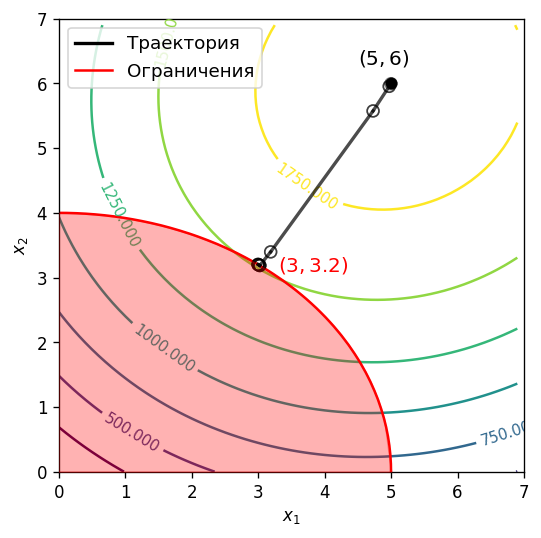

In [43]:
xlim = (0, 7)
ylim = (0, 7)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

plt.text(4.5, 6.3, '$(5, 6)$', fontsize=12)
plt.scatter(5, 6, c='k', marker='o', s=50, linewidth=0.1)

plt.text(3.3, 3.1, '$(3, 3.2)$', color='r', fontsize=12)

for i in range(df.shape[0] - 1):
    plt.scatter([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], s=50, facecolors='none', edgecolors='k', zorder=10, alpha=0.5)
    if i == 0:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, label='Траектория')
    else:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, alpha=0.7)

x = np.linspace(-2, 12, 100)
y = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x,y)
F = 16 * X**2 + 25 * Y**2 - 400
plt.contour(X,Y,F,[0], colors='r')
plt.plot([10, 11], [10, 11], c='r', label='Ограничения') # dumb

def circle(x1):
    return np.sqrt(400 - 16 * x1 ** 2)/5

section = np.arange(-1, 6, 0.1)
plt.fill_between(section, circle(section), color='r', alpha=0.3, zorder=10)


plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=2, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../pics/penalty', bbox_inches='tight')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


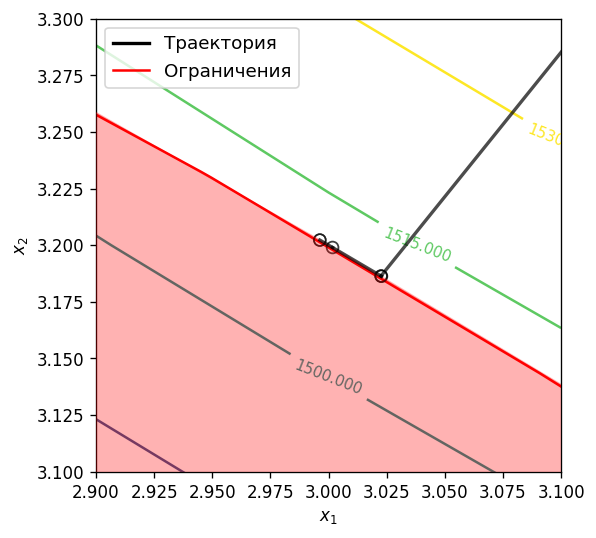

In [44]:
xlim = (2.9, 3.1)
ylim = (3.1, 3.3)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0] - 0.1, ylim[1] + 0.1, delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 5)
plt.clabel(CS, fontsize=9, inline=1)

#plt.text(4.5, 6.3, '$(5, 6)$', fontsize=12)
#plt.scatter(5, 6, c='k', marker='o', s=50, linewidth=0.1)

#plt.text(3.3, 3.1, '$(3, 3.2)$', color='r', fontsize=12)

for i in range(df.shape[0] - 1):
    plt.scatter([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], s=50, facecolors='none', edgecolors='k', zorder=10, alpha=0.5)
    if i == 0:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, label='Траектория')
    else:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, alpha=0.7)

x = np.linspace(-2, 12, 100)
y = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x,y)
F = 16 * X**2 + 25 * Y**2 - 400
plt.contour(X,Y,F,[0], colors='r')
plt.plot([10, 11], [10, 11], c='r', label='Ограничения') # dumb

def circle(x1):
    return np.sqrt(400 - 16 * x1 ** 2)/5

section = np.arange(-1, 6, 0.1)
plt.fill_between(section, circle(section), color='r', alpha=0.3, zorder=10)


plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=2, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../pics/penalty_zoom', bbox_inches='tight')
plt.show()

# Метод возможных направлений

In [45]:
import re
with open('shit.txt', encoding='utf8') as file:
    content = file.readlines()
    
s = ''.join(content).replace('\n', ' ').replace('Значения функции:', 'f=').replace('Шаг номер: ', 'i=').strip()
s = s.replace('Координаты точки: ', '')
s = re.sub(' +', ' ', s)

In [46]:
df = pd.DataFrame(columns = ['i', 'x1', 'x2', 'u', 'f', 'k1', 'k2'])
i = 0
for si in s.split('______________________________')[2:14]:
    l = si.split(' ')
    i = int(l[2])
    x1 = float(l[7])
    x2 = float(l[8])
    u = float(l[10])
    fx = float(l[12])
    k1 = float(l[15])
    k2 = float(l[18])
    df.loc[i] = [i, x1, x2, u, fx, k1, k2]
    i += 1

In [47]:
df.loc[1] = [1, 0, 0, 1, 0, 1, -0.6371]
df.loc[14] = [14, 3.0225, 3.1864, 0.0034, 1.5109e+03, 1, 0.6071]

df.i = df.i.astype(int)

In [48]:
df = df.sort_index()
df

,i,x1,x2,u,f,k1,k2
1,1,0.0000,0.0000,1.0000,0.0,1.0000,-0.6371
2,2,2.7735,3.3282,17.2738,1506.4,2.0441,2.7880
3,3,2.9559,3.2120,1.0000,1508.0,1.0000,-0.6143
4,4,2.9632,3.2219,4.1338,1510.6,1.9922,2.8055
5,5,3.0078,3.1945,1.0000,1510.7,1.0000,-0.6088
6,6,3.0082,3.1950,0.9963,1510.9,1.9809,2.8115
7,7,3.0191,3.1885,1.0000,1510.9,1.0000,-0.6075
8,8,3.0191,3.1885,0.2405,1510.9,1.9783,2.8131
9,9,3.0217,3.1869,1.0000,1510.9,1.0000,-0.6072
10,10,3.0217,3.1869,0.0581,1510.9,1.9777,2.8135


In [49]:
df.to_csv('../data/available.csv', index=False)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


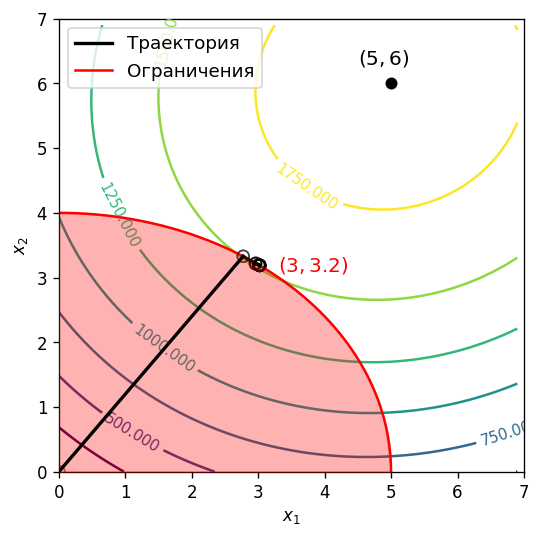

In [50]:
xlim = (0, 7)
ylim = (0, 7)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

plt.text(4.5, 6.3, '$(5, 6)$', fontsize=12)
plt.scatter(5, 6, c='k', marker='o', s=50, linewidth=0.1)

plt.text(3.3, 3.1, '$(3, 3.2)$', color='r', fontsize=12)

for i in np.arange(1, df.shape[0] - 1):
    plt.scatter([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], s=50, facecolors='none', edgecolors='k', zorder=10, alpha=0.5)
    if i == 1:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, label='Траектория')
    else:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, alpha=0.7)

x = np.linspace(-2, 12, 100)
y = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x,y)
F = 16 * X**2 + 25 * Y**2 - 400
plt.contour(X,Y,F,[0], colors='r')
plt.plot([10, 11], [10, 11], c='r', label='Ограничения') # dumb

def circle(x1):
    return np.sqrt(400 - 16 * x1 ** 2)/5

section = np.arange(-1, 6, 0.1)
plt.fill_between(section, circle(section), color='r', alpha=0.3, zorder=10)


plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=2, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../pics/available', bbox_inches='tight')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


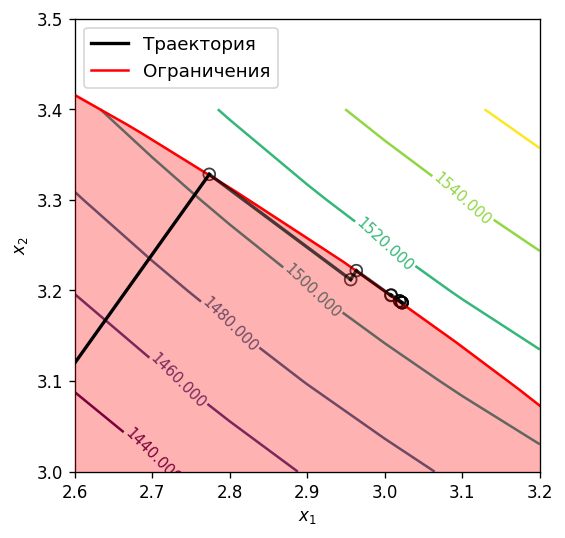

In [51]:
xlim = (2.6, 3.2)
ylim = (3, 3.5)
delta = 0.1
x = np.arange(xlim[0], xlim[1], delta)
y = np.arange(ylim[0], ylim[1], delta)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure(figsize=(5, 5), dpi=120)
CS = plt.contour(X, Y, Z, 8)
plt.clabel(CS, fontsize=9, inline=1)

for i in np.arange(1, df.shape[0] - 1):
    plt.scatter([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], s=50, facecolors='none', edgecolors='k', zorder=10, alpha=0.5)
    if i == 1:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, label='Траектория')
    else:
        plt.plot([df.x1[i], df.x1[i+1]], [df.x2[i], df.x2[i+1]], c='k', linewidth=2, zorder=10, alpha=0.7)

x = np.linspace(-2, 12, 100)
y = np.linspace(-2, 12, 100)
X, Y = np.meshgrid(x,y)
F = 16 * X**2 + 25 * Y**2 - 400
plt.contour(X,Y,F,[0], colors='r')
plt.plot([10, 11], [10, 11], c='r', label='Ограничения') # dumb

def circle(x1):
    return np.sqrt(400 - 16 * x1 ** 2)/5

section = np.arange(-1, 6, 0.1)
plt.fill_between(section, circle(section), color='r', alpha=0.3, zorder=10)


plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc=2, frameon=True, fancybox=True, fontsize=11)
plt.savefig('../pics/available_zoom', bbox_inches='tight')
plt.show()